In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("cloud_usage_26_months_final.csv")
print(df)

      timestamp          region service_type  usage_units  \
0    2023-01-01   Central India      Compute       417.38   
1    2023-01-02         East US      Storage       399.78   
2    2023-01-03     West Europe      Compute       431.90   
3    2023-01-04  Southeast Asia      Storage       467.14   
4    2023-01-05   Central India      Compute       410.22   
..          ...             ...          ...          ...   
775  2025-02-14  Southeast Asia      Storage       225.04   
776  2025-02-15   Central India      Compute          NaN   
777  2025-02-16         East US      Storage       271.70   
778  2025-02-17     West Europe      Compute          NaN   
779  2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72     26.09             99.86           1   
1                  499.72      7.50             99.86           0   
2                  539.88       NaN             99.86       

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp') 
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute          NaN   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute          NaN   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72     26.09             99.86           1   
1                  499.72      7.50             99.86           0   
2                  539.88       NaN             99.86           0   
3  

In [3]:
df['usage_units'] = df['usage_units'].interpolate()
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72     26.09             99.86           1   
1                  499.72      7.50             99.86           0   
2                  539.88       NaN             99.86           0   
3  

In [4]:
df['usage_lag_1'] = df['usage_units'].shift(1)
df['rolling_avg_7'] = df['usage_units'].rolling(7).mean()
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72     26.09             99.86           1   
1                  499.72      7.50             99.86           0   
2                  539.88       NaN             99.86           0   
3  

In [5]:
df['cost_usd'] = df['cost_usd'].fillna(
    df['usage_units'] * 0.5)
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [6]:
df['availability_pct'] = df['availability_pct'].ffill()
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [7]:
df.isnull().sum()
print(df.isnull().sum())

timestamp                0
region                   0
service_type             0
usage_units              0
provisioned_capacity    31
cost_usd                 0
availability_pct         0
is_weekend               0
utilization_pct          0
usage_lag_1              1
rolling_avg_7            6
dtype: int64


In [8]:
df = df.sort_values("timestamp").reset_index(drop=True)
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [9]:
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [10]:
df["lag_1_usage"] = df["usage_units"].shift(1) 
df["lag_7_usage"] = df["usage_units"].shift(7)
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

Matplotlib is building the font cache; this may take a moment.


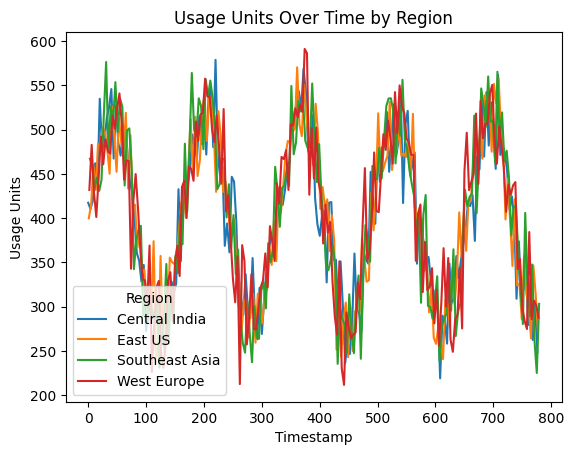

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [11]:
import matplotlib.pyplot as plt 
df.groupby('region')['usage_units'].plot(legend=True)
plt.title('Usage Units Over Time by Region')
plt.xlabel('Timestamp')
plt.ylabel('Usage Units')
plt.legend(title='Region')
plt.show()
print(df)

In [12]:
df["rolling_mean_3"] = df["usage_units"].rolling(window=3).mean()
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [13]:
threshold = df["usage_units"].mean() + df["usage_units"].std()
df["usage_spike"] = np.where(df["usage_units"] > threshold, 1, 0)
print(df)

     timestamp          region service_type  usage_units  \
0   2023-01-01   Central India      Compute       417.38   
1   2023-01-02         East US      Storage       399.78   
2   2023-01-03     West Europe      Compute       431.90   
3   2023-01-04  Southeast Asia      Storage       467.14   
4   2023-01-05   Central India      Compute       410.22   
..         ...             ...          ...          ...   
775 2025-02-14  Southeast Asia      Storage       225.04   
776 2025-02-15   Central India      Compute       248.37   
777 2025-02-16         East US      Storage       271.70   
778 2025-02-17     West Europe      Compute       287.43   
779 2025-02-18  Southeast Asia      Storage       303.16   

     provisioned_capacity  cost_usd  availability_pct  is_weekend  \
0                  521.72    26.090             99.86           1   
1                  499.72     7.500             99.86           0   
2                  539.88   215.950             99.86           0   
3  

In [14]:
df = pd.get_dummies(df, columns=["region", "service_type"], drop_first=True)
print(df)

     timestamp  usage_units  provisioned_capacity  cost_usd  availability_pct  \
0   2023-01-01       417.38                521.72    26.090             99.86   
1   2023-01-02       399.78                499.72     7.500             99.86   
2   2023-01-03       431.90                539.88   215.950             99.86   
3   2023-01-04       467.14                583.92     8.760             99.85   
4   2023-01-05       410.22                512.78    25.640             99.86   
..         ...          ...                   ...       ...               ...   
775 2025-02-14       225.04                281.30     4.220             99.88   
776 2025-02-15       248.37                318.30   124.185             99.87   
777 2025-02-16       271.70                   NaN     5.090             99.87   
778 2025-02-17       287.43                347.76    17.390             99.87   
779 2025-02-18       303.16                378.95     5.680             99.87   

     is_weekend  utilizatio

In [15]:
df.info()
df.head()
df.isnull().sum()
print(df.info())
print(df.head())    
print(df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              780 non-null    datetime64[us]
 1   usage_units            780 non-null    float64       
 2   provisioned_capacity   749 non-null    float64       
 3   cost_usd               780 non-null    float64       
 4   availability_pct       780 non-null    float64       
 5   is_weekend             780 non-null    int64         
 6   utilization_pct        780 non-null    float64       
 7   usage_lag_1            779 non-null    float64       
 8   rolling_avg_7          774 non-null    float64       
 9   hour                   780 non-null    int32         
 10  day                    780 non-null    int32         
 11  weekday                780 non-null    int32         
 12  lag_1_usage            779 non-null    float64       
 13  lag_7_usage     